# Battle for Riddler Nation!
## Riddler Classic May 19 2017

Simulate [castle game from Riddler](http://fivethirtyeight.com/features/the-battle-for-riddler-nation-round-2/)
Create two classes, a `Player` and a `Castle`. Then we assign the soldiers to the castles and evaluate the result. I'll do 10,000 simulations. 

## Classes

In [1]:
class Player(object):
    def __init__(self, name, assignment, points=0):
        self.name = 'Player {}'.format(name)
        self.assignment = assignment
        self.points=0
        
    def deploy_troops_randomly(self):
        from numpy.random import randint, permutation
        order = []
        soldiers_remaining = 101
        for i in range(10):
            soldiers = randint(0, soldiers_remaining)
            if soldiers > 70:
                soldiers = randint(0, soldiers_remaining-29) # helps to control for large assignments to one base
            order.append(soldiers)
            soldiers_remaining -= soldiers
            if soldiers_remaining < 0:
                remains = 10 - len(order)
                for i in range(remains):
                    order.append(0)
               
        self.assignment = permutation(order)
        return np.array(self.assignment)
            
            
class Castle(object):
    # create the castles for the competition
    def __init__(self, name, points, soldiers_1, soldiers_2):
        self.name = name
        self.points = points
        self.soldiers_1 = soldiers_1
        self.soldiers_2 = soldiers_2
        
    def battle(self, player_1, player_2):
        if self.soldiers_1 > self.soldiers_2:
            player_1.points += self.points
        if self.soldiers_1 < self.soldiers_2:
            player_2.points += self.points
        if self.soldiers_1 == self.soldiers_2:
            player_1.points += self.points/2.0
            player_2.points += self.points/2.0
    def info(self):
        print("Castle Name: {}".format(self.name), "Victory Points: {}".format(self.points), 
              "Player 1 Soldiers: {}".format(self.soldiers_1), "Player 2 Soldiers: {}".format(self.soldiers_2), '\n', sep='\n',)

## Functions and gameplay

In [2]:
def Play_normal(player_1, player_2, verbose=0):
    player_1.points=0
    player_2.points=0
    player_1.deploy_troops_randomly()
    player_2.deploy_troops_randomly()
    player_1_assignment = player_1.assignment
    player_2_assignment = player_2.assignment
    castle_dict = {}
    for i in range(10):
        castle_dict['Castle {}'.format(i+1)] = Castle(name='Castle {}'.format(i+1), points = i+1, soldiers_1=player_1_assignment[i], soldiers_2=player_2_assignment[i])
    for castle in castle_dict.values():
        if verbose>0: castle.info()
        castle.battle(player_1, player_2)
    if verbose>0: 
        print(player_1.name, ":", player_1.points, player_2.name,":", player_2.points)
        if player_1.points>player_2.points: print(player_1.name, 'Wins!')
        elif player_1.points<player_2.points: print(player_2.name, 'Wins!')
        else: print("TIE?!")
    if player_1.points>player_2.points: winner=player_1.name
    if player_1.points<player_2.points: winner=player_2.name
    elif player_1.points==player_2.points: winner = 0
    
    return (player_1_assignment, player_2_assignment, player_1.points, player_2.points, winner)
    
        
def Play_random(player_1, player_2, verbose=0):
    player_1.points=0
    player_2.points=0
    player_1.deploy_troops_randomly()
    player_2.deploy_troops_randomly()
    player_1_assignment = player_1.assignment
    player_2_assignment = player_2.assignment
    castle_dict = {}
    for i in range(10):
        castle_dict['Castle {}'.format(i+1)] = Castle(name='Castle {}'.format(i+1), points = i+1, soldiers_1=player_1_assignment[i], soldiers_2=player_2_assignment[i])
    for castle in castle_dict.values():
        if verbose>0: castle.info()
        castle.battle(player_1, player_2)
    if verbose>0: 
        print(player_1.name, ":", player_1.points, player_2.name,":", player_2.points)
        if player_1.points>player_2.points: print(player_1.name, 'Wins!')
        elif player_1.points<player_2.points: print(player_2.name, 'Wins!')
        else: print("TIE?!")
    if player_1.points>player_2.points: winner=player_1.name
    if player_1.points<player_2.points: winner=player_2.name
    elif player_1.points==player_2.points: winner = 0
    
    return (player_1_assignment, player_2_assignment, player_1.points, player_2.points, winner)
    
def test_strat(player_1, player_2, verbose=0):
    player_1.points=0
    player_2.points=0
    # player_1.deploy_troops_randomly() ## this means we'll compare one distribution against random
    player_2.deploy_troops_randomly()
    player_1_assignment = player_1.assignment
    player_2_assignment = player_2.assignment
    castle_dict = {}
    for i in range(10):
        castle_dict['Castle {}'.format(i+1)] = Castle(name='Castle {}'.format(i+1), points = i+1, soldiers_1=player_1_assignment[i], soldiers_2=player_2_assignment[i])
    for castle in castle_dict.values():
        if verbose>0: castle.info()
        castle.battle(player_1, player_2)
    if verbose>0: 
        print(player_1.name, ":", player_1.points, player_2.name,":", player_2.points)
        if player_1.points>player_2.points: print(player_1.name, 'Wins!')
        elif player_1.points<player_2.points: print(player_2.name, 'Wins!')
        else: print("TIE?!")
    if player_1.points>player_2.points: winner=player_1.name
    if player_1.points<player_2.points: winner=player_2.name
    elif player_1.points==player_2.points: winner = 0
    
    return (player_1_assignment, player_2_assignment, player_1.points, player_2.points, winner)
          

## One simulation

In [3]:
p1 = Player('Adam', None)
p2 = Player('Evil Invader', None)
import numpy as np

In [4]:
Play_random(p1,p2, verbose=0)

(array([ 0,  2,  0, 11,  0, 63,  0,  0,  0, 24]),
 array([ 0,  0,  5,  0, 65, 21,  5,  0,  2,  2]),
 26.5,
 28.5,
 'Player Evil Invader')

## Many simulations and EDA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [6]:
games = {}
for i in range(10000):
    games['game_{}'.format(i)] = Play_random(p1,p2, verbose=0)

In [7]:
df = pd.DataFrame(games).T
df.columns = ['distribution_1', 'distribution_2', 'points_1', 'points_2', 'winner']

In [8]:
df.sample(4)

,distribution_1,distribution_2,points_1,points_2,winner
game_3309,"[0, 42, 4, 19, 2, 3, 0, 0, 4, 26]","[0, 51, 0, 0, 0, 11, 1, 37, 0, 0]",31.5,23.5,Player Adam
game_236,"[3, 0, 44, 0, 0, 45, 0, 0, 8, 0]","[30, 7, 0, 0, 59, 0, 2, 2, 0, 0]",25,30,Player Evil Invader
game_3429,"[0, 9, 26, 0, 12, 0, 7, 1, 4, 41]","[0, 9, 6, 2, 25, 26, 0, 2, 30, 0]",21.5,33.5,Player Evil Invader
game_7539,"[7, 16, 4, 1, 0, 0, 49, 21, 0, 2]","[46, 0, 0, 37, 10, 0, 0, 0, 7, 0]",33,22,Player Adam


In [9]:
def get_castle_scores(series):
    distribution_set = series.values # get the distribution arrays
    distribuion_dict = {} #store them in a new dict
    for i in range(10):
        distribuion_dict['castle_{}'.format(i+1)] = []
    for distribution in distribution_set:
        for i in range(10):
            distribuion_dict['castle_{}'.format(i+1)].append(distribution[i])
    return distribuion_dict          

In [10]:
player_1_distributions = get_castle_scores(df.distribution_1)
player_2_distributions = get_castle_scores(df.distribution_2)

In [11]:
p1_df = pd.DataFrame(player_1_distributions)
p2_df = pd.DataFrame(player_2_distributions)

In [12]:
p1_df.head()

,castle_1,castle_10,castle_2,castle_3,castle_4,castle_5,castle_6,castle_7,castle_8,castle_9
0,0,0,1,44,0,0,0,53,2,0
1,0,68,1,0,22,0,0,0,1,8
2,7,0,59,0,0,0,0,0,2,32
3,1,0,0,1,2,1,41,0,39,15
4,15,26,0,0,13,9,32,0,5,0


## Winning Distributions

In [13]:
def get_winning_distributions(row):
    if row.points_2 > row.points_1:
        return (row.distribution_2, row.points_2)
    if row.points_2 < row.points_1:
        return (row.distribution_1, row.points_1)
    else:
        return np.nan

In [14]:
df.sample(10).apply(get_winning_distributions, axis=1)

game_948      ([0, 0, 2, 61, 0, 2, 27, 1, 5, 2], 37.0)
game_3211       ([1, 0, 1, 2, 3, 1, 0, 70, 2, 19], 40)
game_6163      ([55, 0, 2, 12, 0, 1, 1, 16, 7, 6], 29)
game_3505    ([4, 67, 5, 10, 0, 0, 13, 1, 0, 0], 31.5)
game_1987    ([0, 14, 0, 0, 12, 70, 0, 0, 4, 0], 30.5)
game_6038    ([1, 0, 21, 3, 0, 8, 39, 0, 2, 26], 34.0)
game_6451     ([0, 0, 0, 30, 0, 0, 2, 63, 0, 5], 29.5)
game_2466    ([0, 0, 67, 13, 0, 0, 0, 6, 1, 13], 35.5)
game_2640    ([0, 0, 0, 0, 56, 11, 32, 0, 0, 1], 29.5)
game_6284     ([9, 55, 0, 1, 29, 0, 1, 2, 2, 1], 30.0)
dtype: object

In [15]:
winners = pd.DataFrame(df.apply(get_winning_distributions, axis=1)).dropna()
winners.columns = ['data']
winners['distribution'] = winners.data.apply(lambda x: x[0])
winners['points'] = winners.data.apply(lambda x: x[1])
winners.drop('data', axis=1, inplace=True)

In [16]:
wins = pd.DataFrame(get_castle_scores(winners.distribution))
wins['points'] = winners['points'].values
wins.head()

,castle_1,castle_10,castle_2,castle_3,castle_4,castle_5,castle_6,castle_7,castle_8,castle_9,points
0,39,16,0,27,0,0,5,0,5,8,38.5
1,0,0,1,5,0,0,3,62,29,0,28.0
2,7,0,59,0,0,0,0,0,2,32,30.5
3,1,0,0,1,2,1,41,0,39,15,29.0
4,15,26,0,0,13,9,32,0,5,0,29.5


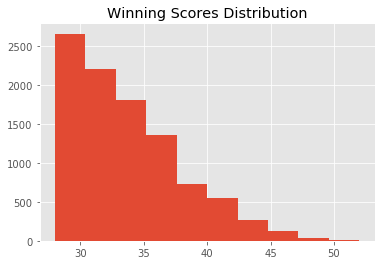

In [17]:
# distribution of winning scores
wins.points.hist()
plt.title('Winning Scores Distribution')
plt.show()

In [18]:
wins.describe()

,castle_1,castle_10,castle_2,castle_3,castle_4,castle_5,castle_6,castle_7,castle_8,castle_9,points
count,9749.000000,9749.000000,9749.000000,9749.000000,9749.000000,9749.000000,9749.000000,9749.000000,9749.000000,9749.000000,9749.000000
mean,8.160632,12.244948,8.610832,8.671659,8.994358,9.636168,10.119602,10.550313,11.033337,11.773823,33.601805
std,14.073407,17.212612,14.681014,14.495284,14.992135,15.392367,15.793466,16.139201,16.397223,16.899454,4.338419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,33.000000
75%,10.000000,18.000000,10.000000,11.000000,11.000000,12.000000,13.000000,14.000000,16.000000,17.000000,36.500000
max,71.000000,71.000000,70.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,52.000000


In [19]:
means = wins.describe().loc['mean'][:10]
means

castle_1      8.160632
castle_10    12.244948
castle_2      8.610832
castle_3      8.671659
castle_4      8.994358
castle_5      9.636168
castle_6     10.119602
castle_7     10.550313
castle_8     11.033337
castle_9     11.773823
Name: mean, dtype: float64

In [41]:
int_scores = [8, 8, 9, 10, 10, 10, 10, 11, 12, 12]

In [42]:
sum(int_scores)

100

## Test new player strategy against random opponent


In [51]:
master = Player('Master', assignment=int_scores)
random_player = Player('Barbarian', None)

In [52]:
test_games = {}
for i in range(10000):
    test_games['test_game_{}'.format(i)] = test_strat(master,random_player, verbose=0)

In [53]:
chall = pd.DataFrame(test_games).T
chall.columns = ['distribution_1', 'distribution_2', 'points_1', 'points_2', 'winner']

In [54]:
chall.head()

,distribution_1,distribution_2,points_1,points_2,winner
test_game_0,"[8, 8, 9, 10, 10, 10, 10, 11, 12, 12]","[0, 21, 0, 44, 0, 3, 29, 0, 2, 1]",42,13,Player Master
test_game_1,"[8, 8, 9, 10, 10, 10, 10, 11, 12, 12]","[0, 1, 0, 56, 0, 1, 4, 24, 14, 0]",34,21,Player Master
test_game_10,"[8, 8, 9, 10, 10, 10, 10, 11, 12, 12]","[20, 1, 0, 7, 3, 1, 0, 0, 68, 0]",45,10,Player Master
test_game_100,"[8, 8, 9, 10, 10, 10, 10, 11, 12, 12]","[0, 6, 0, 0, 47, 0, 0, 0, 47, 0]",41,14,Player Master
test_game_1000,"[8, 8, 9, 10, 10, 10, 10, 11, 12, 12]","[0, 7, 1, 1, 0, 0, 25, 25, 41, 0]",31,24,Player Master
